# Titanic Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## load dataset

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## check data types

In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
{ col: df[col].nunique() for col in df.columns if df[col].dtype == 'object' }

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [6]:
df = df.astype(
    {
        'alive': 'category',
        'sex': 'category',
        'embarked': 'category',
        'who': 'category',
        'embark_town': 'category',
    }
)

In [7]:
df.alive

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: category
Categories (2, object): ['no', 'yes']

In [8]:
df.sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: category
Categories (2, object): ['female', 'male']

In [9]:
df.alive.cat.codes

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int8

In [10]:
df.alive = df.alive.cat.codes

In [11]:
df.sex = df.sex.cat.codes

In [12]:
df[['alive', 'sex']]

,alive,sex
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,0,0
889,1,1


In [13]:
df.dtypes

survived          int64
pclass            int64
sex                int8
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive              int8
alone              bool
dtype: object

## check correlation

In [14]:
df.corr(numeric_only=True)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [15]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [16]:
df.corr(numeric_only=True)[["survived"]].style.background_gradient(cmap="coolwarm")

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


In [17]:
# returns dataframe
df[['survived']]

# returns series
df['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [18]:
df.drop(columns=['alive'], inplace=True)

## Describe Data

In [19]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


> Data is relatively imbalanced!

In [20]:
(df.embarked == df.embark_town.str.get(0)).all()

False

In [21]:
df[df.embarked != df.embark_town.str.get(0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
61,1,1,0,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,True
829,1,1,0,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,True


In [22]:
df.drop(columns=['embark_town'], inplace=True)

## missing values check

In [23]:
df.isna().sum() / df.shape[0]

survived      0.000000
pclass        0.000000
sex           0.000000
age           0.198653
sibsp         0.000000
parch         0.000000
fare          0.000000
embarked      0.002245
class         0.000000
who           0.000000
adult_male    0.000000
deck          0.772166
alone         0.000000
dtype: float64

<Axes: >

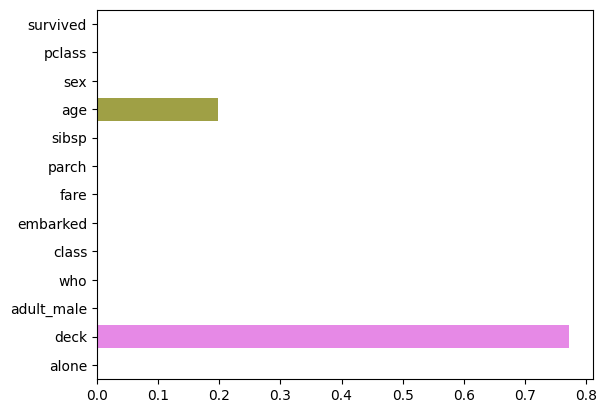

In [24]:
%matplotlib inline
sns.barplot(
    x=df.isna().sum() / df.shape[0],
    y=df.columns
)

In [27]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

### Deck

In [28]:
df.drop(columns='deck', inplace=True)

In [32]:
df.corr(numeric_only=True)[['survived']]

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alone,-0.203367


In [33]:
df.age.fillna(df.age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [35]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [36]:
df.corr(numeric_only=True)[['age']].style.background_gradient(cmap='coolwarm')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alone,0.198270


In [53]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [52]:
df.groupby(['adult_male']).age.transform('mean')

0      33.173123
1      24.932458
2      24.932458
3      24.932458
4      33.173123
         ...    
886    33.173123
887    24.932458
888    24.932458
889    33.173123
890    33.173123
Name: age, Length: 891, dtype: float64

In [54]:
df.groupby(['adult_male']).age.mean()

adult_male
False    24.932458
True     33.173123
Name: age, dtype: float64

In [49]:
df['age_1'] = df.age.fillna(
    df.groupby(['adult_male']).age.transform('mean')
)

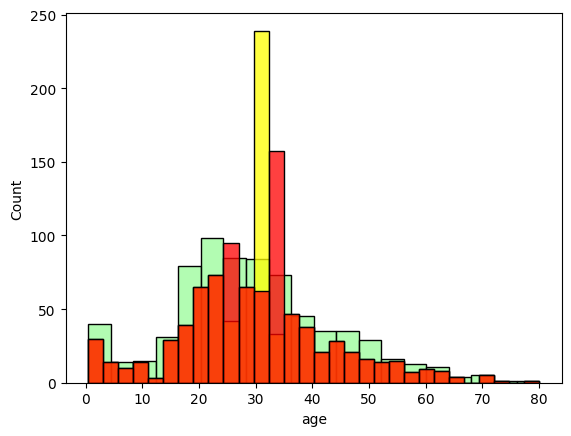

In [51]:
ax = sns.histplot(df.age, color='palegreen')
sns.histplot(df.age.fillna(df.age.mean()), ax=ax, color='yellow')
ax = sns.histplot(df.age_1, color='red')

In [55]:
df.groupby(['adult_male', 'alone']).age.mean()

adult_male  alone
False       False    22.393350
            True     29.960396
True        False    33.722727
            True     32.973597
Name: age, dtype: float64